<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Выбор-фичей-и-целевого-показателя" data-toc-modified-id="Выбор-фичей-и-целевого-показателя-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выбор фичей и целевого показателя</a></span></li><li><span><a href="#Сохранение-исходных-данных" data-toc-modified-id="Сохранение-исходных-данных-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сохранение исходных данных</a></span></li><li><span><a href="#Разделение-на-обучающую-и-тестовую-выборку" data-toc-modified-id="Разделение-на-обучающую-и-тестовую-выборку-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Разделение на обучающую и тестовую выборку</a></span></li><li><span><a href="#Масштабирование" data-toc-modified-id="Масштабирование-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Масштабирование</a></span></li><li><span><a href="#Сравнение-качества-моделей" data-toc-modified-id="Сравнение-качества-моделей-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Сравнение качества моделей</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Загрузка данных

In [2]:
df = pd.read_csv('/datasets/insurance.csv')
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [3]:
df.shape

(5000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


<AxesSubplot:title={'center':'Кол-во страховых выплат'}, xlabel='Страховые выплаты'>

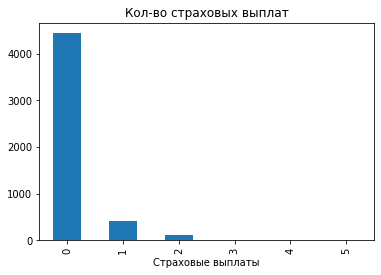

In [5]:
df.groupby('Страховые выплаты').count()['Пол'].plot(kind='bar', title='Кол-во страховых выплат')

<AxesSubplot:title={'center':'Возраст клиентов'}, ylabel='Frequency'>

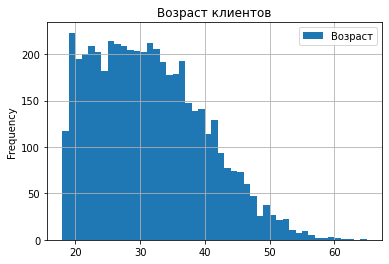

In [6]:
df[['Возраст']].plot(bins=47, kind='hist', title='Возраст клиентов', grid=True)

<AxesSubplot:>

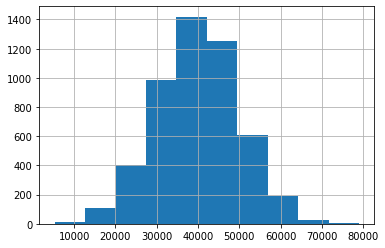

In [7]:
#Зарплата клиентов
df['Зарплата'].hist()

<AxesSubplot:>

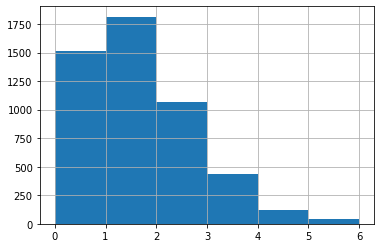

In [8]:
df['Члены семьи'].hist(bins=6)

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** b. Не изменится.

$A$ - обратная матрица

Если признаки умножить на обратную матрицу мы получим новую матрицу:

$$
X new = A * X
$$

Следовательно и будудут новые веса:

$$
w new = A * w
$$
$
w_0 -  начальное значение предсказания модели
$

Формула линейной регрессии:
$$
y = w_0 + w_1new * x_1 new + w_2new*x_2new + ... + w_nnew*x_nnew
$$

Рассмотрим предсказание на новых признаках:

$$
a new = X new * w new
$$
$$
a new =(A * X) * (A * w) = 2 A * (X * W)
$$

**Обоснование:** Таким образом из данного доказательства следует, что предсказания модели на исходных признаках и на новых признаках будут одинаковыми, следовательно, качество линейной регрессии не изменится.

Как я понял параметры связаны тем что параметры модели изменяются путем умножения исходных параметров на обратную матрицу, а начальный сдвиг остается неизменным.

## Алгоритм преобразования

**Алгоритм**

- Удалить из таблицы признаки, которые будут идентифицировать пользователя (имя, адрес и т.д.).

В данной таблицы таких столбцов не наблюдаем.

- сохранить исхо исходные данные чтобы на них можно было тоже произвести обучение.

- В таблице есть категориальный признак, который уже преобразован в численный, с ними особо ничего нельзя сделать. `Пол`. Но их можно попробовать от масштабировать
- Затем идут такие фича как `Возраст`, `Зарплата`, `Члены семьи` и `Страховые выплаты`. 
- Выбрать фичи из таблицы и целевой показатель. 
- Разделение на обучающую и тестовые выборки


**Обоснование**

В моем понимании можно масштабировать при помощи метода StandardScaler. При этом методе значения признаков масштабируются в оперделенном диапазоне, как я понимаю по отношению друг к другу они не шибко изменятся, поэтому веса у модели останутся такие же и качество обучения совпадет. 

Формула для cтандартизации:
$$
x\ scaled = (x - n) / q
$$
то есть приведению к нулевому среднему значению и единичному стандартному нормальному распределению.

Как я понимаю к примеру если рассматривать максимальный возраст, он и останется максимальным на фоне всех остальных клиентов. И получит такой же весовой коэфицент как и при первичном обучении. 

## Проверка алгоритма
### Выбор фичей и целевого показателя

In [9]:
df.columns

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

In [10]:
x_col = df.drop('Страховые выплаты', axis=1).columns
y_col = df[['Страховые выплаты']].columns

### Сохранение исходных данных

In [11]:
df_scaled = df.copy()

### Разделение на обучающую и тестовую выборку

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df[x_col], df[y_col],
                                                    test_size=0.4, random_state=42)

x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(df_scaled[x_col], df_scaled[y_col],
                                                                                test_size=0.4, random_state=42)

### Масштабирование 

In [15]:
#стандартизация фичей
scaler  = StandardScaler()
scaled_data  = scaler.fit(x_scaled_train)

In [16]:
x_scaled_train = pd.DataFrame(scaler.transform(x_scaled_train))
x_scaled_test = pd.DataFrame(scaler.transform(x_scaled_test))

In [17]:
#решил отдельно обучить таргет, разницы никакой не дало
scaler  = StandardScaler()
scaled_data  = scaler.fit(y_scaled_train)

y_scaled_train= pd.DataFrame(scaler.transform(y_scaled_train))
y_scaled_test = pd.DataFrame(scaler.transform(y_scaled_test))

In [18]:
data_scaled = x_scaled_train.copy()
data_scaled[4] = y_scaled_train
data_scaled

,0,1,2,3,4
0,-0.995344,0.825498,-0.234425,-0.179417,-0.324867
1,-0.995344,0.108574,1.044091,-0.179417,-0.324867
2,1.004678,1.183960,0.329330,-0.179417,-0.324867
3,1.004678,-0.608350,-0.576704,-1.077999,-0.324867
4,-0.995344,-1.205786,1.285700,0.719165,-0.324867
...,...,...,...,...,...
2995,1.004678,-0.727837,-0.365296,0.719165,-0.324867
2996,-0.995344,0.228061,-1.432404,1.617748,-0.324867
2997,1.004678,0.825498,0.661543,-1.077999,-0.324867
2998,1.004678,0.228061,-0.405565,-1.077999,-0.324867


### Сравнение качества моделей
**Исходная:**

In [25]:
def lineregress(x_train, y_train, x_test, y_test):
    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return 'Доля средней квадратичной ошибки или r2:', r2_score(y_test, pred)

In [26]:
lineregress(x_train, y_train, x_test, y_test)

('Доля средней квадратичной ошибки или r2:', 0.4268018208826925)

**Преобразованная:**

In [29]:
lineregress(x_scaled_train, y_scaled_train, x_scaled_test, y_scaled_test)

('Доля средней квадратичной ошибки или r2:', 0.4268018208826947)

**Вывод**

Качество обучения линейной регрессии вышло сохранить. Таблица стала тяжело интерпретируема, так что данные «под защитой».

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования